# Problem Statement:
### Pedicting effective treatments  for diabetes in turn reducing the readmission into the hospital

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('C:/Users/Win/Desktop/diabetic_data.csv')
df.shape

(101766, 50)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

<AxesSubplot:>

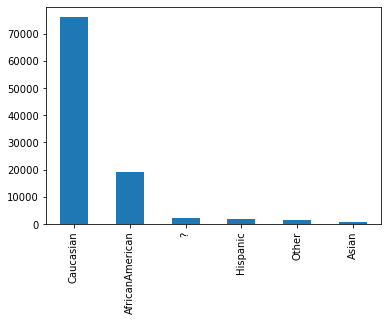

In [5]:
df.race.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

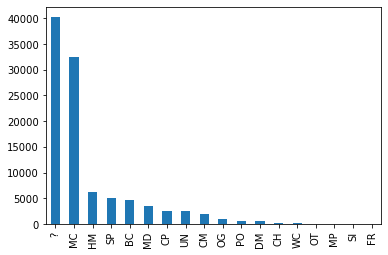

In [6]:
df.payer_code.value_counts().plot(kind = 'bar' )

In [7]:
df.medical_specialty.value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
Perinatology                         1
Dermatology                          1
Proctology                           1
Pediatrics-InfectiousDiseases        1
Neurophysiology                      1
Name: medical_specialty, Length: 73, dtype: int64

<AxesSubplot:>

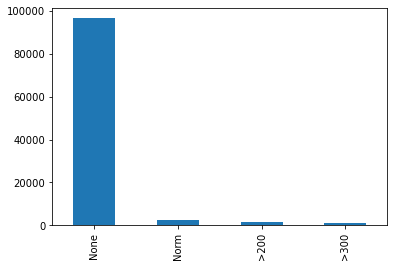

In [8]:
df.max_glu_serum.value_counts().plot(kind = 'bar' )

<AxesSubplot:>

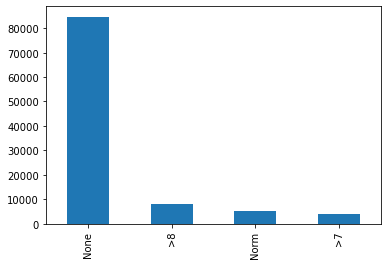

In [9]:
df.A1Cresult.value_counts().plot(kind = 'bar' )

In [10]:
df.diabetesMed.value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [11]:
df=df[df.readmitted=='NO']
df.shape

(54864, 50)

In [12]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


# Handling Missing Values

# ### We can observe that, Payer code, medical speciality & weight have more than 50% of the missing data, and prefer to drop those features.

In [13]:
df.medical_specialty.value_counts()

?                         25952
InternalMedicine           8266
Family/GeneralPractice     3894
Emergency/Trauma           3713
Cardiology                 3074
                          ...  
Psychiatry-Addictive          1
Proctology                    1
Neurophysiology               1
Speech                        1
AllergyandImmunology          1
Name: medical_specialty, Length: 67, dtype: int64

In [14]:
df.payer_code.value_counts()

?     21801
MC    16647
HM     3310
BC     2928
SP     2628
MD     1857
CP     1538
UN     1525
CM     1078
OG      564
PO      404
DM      265
WC      106
CH      100
OT       50
SI       31
MP       31
FR        1
Name: payer_code, dtype: int64

In [15]:
df.weight.value_counts()

?            53534
[75-100)       520
[50-75)        403
[100-125)      266
[125-150)       64
[25-50)         47
[150-175)       16
[0-25)           9
[175-200)        5
Name: weight, dtype: int64

In [16]:
df = df.drop(['medical_specialty','payer_code','weight'],axis=1)

In [17]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,Caucasian,Male,[80-90),1,1,7,1,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**We can observe that the "Race" Feature has some missing values**

# **Missing value Imputation using MODE for Race Feature as most of the people in the Dataset are Caucasian**

# 1. Replacing the ? with NaN's

In [18]:
df.race.value_counts()

Caucasian          40383
AfricanAmerican    10421
?                   1547
Hispanic            1183
Other                915
Asian                415
Name: race, dtype: int64

In [19]:
df['race']=df.race.replace('?',np.nan) 

In [20]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [21]:
df.race.value_counts()

Caucasian          41930
AfricanAmerican    10421
Hispanic            1183
Other                915
Asian                415
Name: race, dtype: int64

In [22]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
treatments = df[['encounter_id','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

In [24]:
treatments

,encounter_id,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,2278392,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,64410,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,No,No,No,No,No,No
3,500364,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
4,16680,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Steady,No,No,No,No,No
6,55842,Steady,No,No,No,Steady,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Up,No,No,No,No,No
101762,443847782,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Steady,No,No,No,No,No
101763,443854148,Steady,No,No,No,No,No,No,No,No,...,No,No,No,No,Down,No,No,No,No,No
101764,443857166,No,No,No,No,No,No,Steady,No,No,...,No,No,No,No,Up,No,No,No,No,No


# FEATURE ENGINEERING

# Custom encoding for the 23 Drug Features

In [25]:
treatments=treatments.replace(['No','Steady','Up','Down'],[0,1,1,1])
treatments.set_index('encounter_id',inplace=True)

In [26]:
pd.set_option('display.max_columns',50)

In [27]:
treatments

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,,,
2278392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64410,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
500364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
55842,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443842778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
443847782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
443854148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
treatments.sum(axis=1).value_counts()

1    24311
0    13930
2    11666
3     4176
4      741
5       39
6        1
dtype: int64

In [29]:
treatments.insulin.value_counts()

1    28186
0    26678
Name: insulin, dtype: int64

# Patients are Given at max a combination of 6 drugs for treating diabetes

# Feature Engineering - Creating a new feature "Treatments"

# 1. When the value of Insuin is '1' , creating the classes "insulin" & "io" (insulin + others )

In [30]:
treatments.metformin.value_counts()

0    43521
1    11343
Name: metformin, dtype: int64

In [31]:
i1 = treatments[treatments['insulin']==1].sum(axis = 1).replace([1,2,3,4,5,6],['1','1','1','1','1','1'])

In [32]:
i1.value_counts()

1    28186
dtype: int64

**2. When the value of Insuin is '0' , creating the classes "others" & "no med"**

In [33]:
i0=treatments[treatments['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['0','0','0','0','0','0','0'])

In [34]:
i0.value_counts()

0    26678
dtype: int64

In [35]:
treatments=pd.concat([i1,i0])
treatments = pd.DataFrame({'treatments':treatments})

In [36]:
treatments

,treatments
encounter_id,
500364,1
16680,1
55842,1
12522,1
15738,1
...,...
443775482,0
443787128,0
443793992,0


In [37]:
df=df.join(treatments,on='encounter_id') #setting index as encounter_id

In [38]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,Caucasian,Male,[80-90),1,1,7,1,1,0,15,3,0,0,435,784,250,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1


# Since the treatments column was created from the 23 Drugs, We will be removing them

In [39]:
df = df.drop(['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1)

In [40]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,NO,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,NO,1
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,Caucasian,Male,[80-90),1,1,7,1,1,0,15,3,0,0,435,784,250,7,None,None,Ch,Yes,NO,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,560,276,787,9,None,None,No,Yes,NO,1
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,38,590,296,13,None,None,Ch,Yes,NO,1
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,996,285,998,9,None,None,Ch,Yes,NO,1


In [41]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted',
       'treatments'],
      dtype='object')

In [42]:
df = pd.get_dummies(df, columns=['race', 'gender','max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted'])

In [43]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

In [44]:
df

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,treatments,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_NO
0,2278392,8222157,5,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
2,64410,86047875,25,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
3,500364,82442376,35,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
4,16680,42519267,45,1,1,7,1,51,0,8,0,0,0,197,157,250,5,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
6,55842,84259809,65,3,1,2,4,70,1,21,0,0,0,414,411,V45,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,85,1,1,7,1,1,0,15,3,0,0,435,784,250,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101762,443847782,74694222,85,1,4,5,5,33,3,18,0,0,1,560,276,787,9,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
101763,443854148,41088789,75,1,1,7,1,53,0,9,1,0,0,38,590,296,13,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101764,443857166,31693671,85,2,3,7,10,45,2,21,0,0,1,996,285,998,9,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1


In [45]:
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

In [46]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "1"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "2"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "3"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "4"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "5"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "6"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "7"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "8"
        data["temp_diag"] = data["temp_diag"].fillna("0")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [47]:
df = map_diagnosis(df,["diag_1","diag_2","diag_3"])

##### df

In [48]:
df

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,treatments,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_NO
0,2278392,8222157,5,6,25,1,1,41,0,1,0,0,0,4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
2,64410,86047875,25,1,1,7,2,11,5,13,2,0,1,0,4,0,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
3,500364,82442376,35,1,1,7,2,44,1,16,0,0,0,0,4,1,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
4,16680,42519267,45,1,1,7,1,51,0,8,0,0,0,8,8,4,5,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
6,55842,84259809,65,3,1,2,4,70,1,21,0,0,0,1,1,0,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,443842778,86472243,85,1,1,7,1,1,0,15,3,0,0,1,0,4,7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101762,443847782,74694222,85,1,4,5,5,33,3,18,0,0,1,3,0,3,9,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
101763,443854148,41088789,75,1,1,7,1,53,0,9,1,0,0,0,7,0,13,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101764,443857166,31693671,85,2,3,7,10,45,2,21,0,0,1,5,0,5,9,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1


In [50]:
x = df.drop(['encounter_id','patient_nbr','race_Other','treatments'],axis=1)
y = df['treatments']
print(x.shape)
print(y.shape)

(54864, 35)
(54864,)


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [53]:
x

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_NO
0,5,6,25,1,1,41,0,1,0,0,0,4,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
2,25,1,1,7,2,11,5,13,2,0,1,0,4,0,6,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
3,35,1,1,7,2,44,1,16,0,0,0,0,4,1,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
4,45,1,1,7,1,51,0,8,0,0,0,8,8,4,5,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
6,65,3,1,2,4,70,1,21,0,0,0,1,1,0,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,85,1,1,7,1,1,0,15,3,0,0,1,0,4,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101762,85,1,4,5,5,33,3,18,0,0,1,3,0,3,9,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
101763,75,1,1,7,1,53,0,9,1,0,0,0,7,0,13,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101764,85,2,3,7,10,45,2,21,0,0,1,5,0,5,9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1


In [54]:
from sklearn.preprocessing import StandardScaler 

In [55]:
sc=StandardScaler()
sc.fit(x_train)
train_scale=sc.transform(x_train)
train_scale=pd.DataFrame(data=train_scale,columns=x_train.columns)
test_scale=sc.transform(x_test)
test_scale=pd.DataFrame(data=test_scale,columns=x_train.columns)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [57]:
LR = LogisticRegression()
LR.fit(train_scale,y_train)

LogisticRegression()

In [58]:
pred_train = LR.predict(train_scale) 
pred_test = LR.predict(test_scale)

In [59]:
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,accuracy_score

In [60]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76     18605
           1       0.75      0.89      0.81     19799

    accuracy                           0.79     38404
   macro avg       0.80      0.79      0.79     38404
weighted avg       0.80      0.79      0.79     38404



In [61]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75      8073
           1       0.74      0.90      0.81      8387

    accuracy                           0.79     16460
   macro avg       0.80      0.78      0.78     16460
weighted avg       0.80      0.79      0.78     16460



In [68]:
accuracy_score(y_train,pred_train)

0.7895271325903551

In [67]:
accuracy_score(y_test,pred_test)

0.7865127582017011

In [63]:
RF = RandomForestClassifier()
RF.fit(train_scale,y_train)

RandomForestClassifier()

In [64]:
pred_train1 = RF.predict(train_scale) 
pred_test1 = RF.predict(test_scale)

In [65]:
accuracy_score(y_train,pred_train1)

1.0

In [66]:
accuracy_score(y_test,pred_test1)

0.8036452004860267

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
adb=AdaBoostClassifier()

In [71]:
adb.fit(train_scale,y_train)

AdaBoostClassifier()

In [72]:
pred_train2 = adb.predict(train_scale) 
pred_test2 = adb.predict(test_scale)

In [73]:
accuracy_score(y_train,pred_train2)

0.8056192063326737

In [74]:
accuracy_score(y_test,pred_test2)

0.8044957472660996

In [77]:
from catboost import CatBoostClassifier

In [78]:
cb=CatBoostClassifier()

In [79]:
cb.fit(train_scale,y_train)

Learning rate set to 0.048917
0:	learn: 0.6368557	total: 160ms	remaining: 2m 40s
1:	learn: 0.5941597	total: 192ms	remaining: 1m 36s
2:	learn: 0.5634191	total: 226ms	remaining: 1m 15s
3:	learn: 0.5383054	total: 252ms	remaining: 1m 2s
4:	learn: 0.5182800	total: 272ms	remaining: 54.2s
5:	learn: 0.5015140	total: 292ms	remaining: 48.4s
6:	learn: 0.4882501	total: 312ms	remaining: 44.3s
7:	learn: 0.4775916	total: 332ms	remaining: 41.2s
8:	learn: 0.4687165	total: 351ms	remaining: 38.7s
9:	learn: 0.4610549	total: 371ms	remaining: 36.7s
10:	learn: 0.4571581	total: 392ms	remaining: 35.3s
11:	learn: 0.4508068	total: 417ms	remaining: 34.4s
12:	learn: 0.4471619	total: 440ms	remaining: 33.4s
13:	learn: 0.4427089	total: 460ms	remaining: 32.4s
14:	learn: 0.4385519	total: 483ms	remaining: 31.7s
15:	learn: 0.4351402	total: 503ms	remaining: 30.9s
16:	learn: 0.4319944	total: 523ms	remaining: 30.2s
17:	learn: 0.4297151	total: 543ms	remaining: 29.6s
18:	learn: 0.4273495	total: 563ms	remaining: 29.1s
19:	lear

163:	learn: 0.3763855	total: 3.6s	remaining: 18.3s
164:	learn: 0.3762849	total: 3.63s	remaining: 18.4s
165:	learn: 0.3761684	total: 3.65s	remaining: 18.3s
166:	learn: 0.3760468	total: 3.67s	remaining: 18.3s
167:	learn: 0.3759985	total: 3.69s	remaining: 18.3s
168:	learn: 0.3758232	total: 3.71s	remaining: 18.3s
169:	learn: 0.3757649	total: 3.73s	remaining: 18.2s
170:	learn: 0.3757320	total: 3.75s	remaining: 18.2s
171:	learn: 0.3756147	total: 3.77s	remaining: 18.1s
172:	learn: 0.3755349	total: 3.79s	remaining: 18.1s
173:	learn: 0.3754686	total: 3.82s	remaining: 18.1s
174:	learn: 0.3753724	total: 3.84s	remaining: 18.1s
175:	learn: 0.3752719	total: 3.86s	remaining: 18.1s
176:	learn: 0.3752003	total: 3.87s	remaining: 18s
177:	learn: 0.3750943	total: 3.9s	remaining: 18s
178:	learn: 0.3750085	total: 3.92s	remaining: 18s
179:	learn: 0.3749375	total: 3.94s	remaining: 17.9s
180:	learn: 0.3748747	total: 3.96s	remaining: 17.9s
181:	learn: 0.3747723	total: 3.98s	remaining: 17.9s
182:	learn: 0.374666

324:	learn: 0.3621140	total: 6.97s	remaining: 14.5s
325:	learn: 0.3620308	total: 7s	remaining: 14.5s
326:	learn: 0.3619411	total: 7.02s	remaining: 14.4s
327:	learn: 0.3618246	total: 7.04s	remaining: 14.4s
328:	learn: 0.3617583	total: 7.05s	remaining: 14.4s
329:	learn: 0.3616656	total: 7.07s	remaining: 14.4s
330:	learn: 0.3616191	total: 7.09s	remaining: 14.3s
331:	learn: 0.3615111	total: 7.11s	remaining: 14.3s
332:	learn: 0.3614102	total: 7.13s	remaining: 14.3s
333:	learn: 0.3613301	total: 7.15s	remaining: 14.3s
334:	learn: 0.3612316	total: 7.18s	remaining: 14.3s
335:	learn: 0.3611593	total: 7.2s	remaining: 14.2s
336:	learn: 0.3610809	total: 7.22s	remaining: 14.2s
337:	learn: 0.3609617	total: 7.25s	remaining: 14.2s
338:	learn: 0.3609596	total: 7.26s	remaining: 14.2s
339:	learn: 0.3608931	total: 7.28s	remaining: 14.1s
340:	learn: 0.3608357	total: 7.3s	remaining: 14.1s
341:	learn: 0.3607276	total: 7.32s	remaining: 14.1s
342:	learn: 0.3606218	total: 7.34s	remaining: 14.1s
343:	learn: 0.360

485:	learn: 0.3505742	total: 10.5s	remaining: 11.1s
486:	learn: 0.3504932	total: 10.5s	remaining: 11.1s
487:	learn: 0.3504158	total: 10.6s	remaining: 11.1s
488:	learn: 0.3503316	total: 10.6s	remaining: 11.1s
489:	learn: 0.3502615	total: 10.6s	remaining: 11s
490:	learn: 0.3502248	total: 10.6s	remaining: 11s
491:	learn: 0.3501406	total: 10.6s	remaining: 11s
492:	learn: 0.3500553	total: 10.7s	remaining: 11s
493:	learn: 0.3499972	total: 10.7s	remaining: 10.9s
494:	learn: 0.3499274	total: 10.7s	remaining: 10.9s
495:	learn: 0.3498546	total: 10.7s	remaining: 10.9s
496:	learn: 0.3497724	total: 10.7s	remaining: 10.9s
497:	learn: 0.3496775	total: 10.8s	remaining: 10.9s
498:	learn: 0.3496738	total: 10.8s	remaining: 10.8s
499:	learn: 0.3496069	total: 10.8s	remaining: 10.8s
500:	learn: 0.3495400	total: 10.8s	remaining: 10.8s
501:	learn: 0.3494677	total: 10.9s	remaining: 10.8s
502:	learn: 0.3493977	total: 10.9s	remaining: 10.7s
503:	learn: 0.3493591	total: 10.9s	remaining: 10.7s
504:	learn: 0.349305

650:	learn: 0.3403932	total: 14s	remaining: 7.51s
651:	learn: 0.3402949	total: 14s	remaining: 7.49s
652:	learn: 0.3402119	total: 14.1s	remaining: 7.47s
653:	learn: 0.3401531	total: 14.1s	remaining: 7.45s
654:	learn: 0.3401270	total: 14.1s	remaining: 7.42s
655:	learn: 0.3400783	total: 14.1s	remaining: 7.4s
656:	learn: 0.3400595	total: 14.1s	remaining: 7.38s
657:	learn: 0.3400538	total: 14.1s	remaining: 7.35s
658:	learn: 0.3399676	total: 14.2s	remaining: 7.33s
659:	learn: 0.3398828	total: 14.2s	remaining: 7.31s
660:	learn: 0.3398758	total: 14.2s	remaining: 7.29s
661:	learn: 0.3398069	total: 14.2s	remaining: 7.27s
662:	learn: 0.3397577	total: 14.3s	remaining: 7.24s
663:	learn: 0.3396997	total: 14.3s	remaining: 7.22s
664:	learn: 0.3396388	total: 14.3s	remaining: 7.2s
665:	learn: 0.3395943	total: 14.3s	remaining: 7.18s
666:	learn: 0.3395338	total: 14.3s	remaining: 7.16s
667:	learn: 0.3394532	total: 14.4s	remaining: 7.13s
668:	learn: 0.3394524	total: 14.4s	remaining: 7.11s
669:	learn: 0.3393

812:	learn: 0.3313429	total: 17.4s	remaining: 4s
813:	learn: 0.3312969	total: 17.4s	remaining: 3.98s
814:	learn: 0.3312585	total: 17.4s	remaining: 3.95s
815:	learn: 0.3311702	total: 17.4s	remaining: 3.93s
816:	learn: 0.3310907	total: 17.5s	remaining: 3.91s
817:	learn: 0.3310208	total: 17.5s	remaining: 3.89s
818:	learn: 0.3309219	total: 17.5s	remaining: 3.87s
819:	learn: 0.3308727	total: 17.5s	remaining: 3.85s
820:	learn: 0.3308094	total: 17.5s	remaining: 3.82s
821:	learn: 0.3308094	total: 17.6s	remaining: 3.8s
822:	learn: 0.3307205	total: 17.6s	remaining: 3.78s
823:	learn: 0.3306698	total: 17.6s	remaining: 3.76s
824:	learn: 0.3305988	total: 17.6s	remaining: 3.74s
825:	learn: 0.3305483	total: 17.6s	remaining: 3.71s
826:	learn: 0.3304698	total: 17.7s	remaining: 3.69s
827:	learn: 0.3304031	total: 17.7s	remaining: 3.67s
828:	learn: 0.3303658	total: 17.7s	remaining: 3.65s
829:	learn: 0.3303653	total: 17.7s	remaining: 3.63s
830:	learn: 0.3302977	total: 17.7s	remaining: 3.61s
831:	learn: 0.33

976:	learn: 0.3223980	total: 20.7s	remaining: 487ms
977:	learn: 0.3223564	total: 20.7s	remaining: 466ms
978:	learn: 0.3222941	total: 20.7s	remaining: 445ms
979:	learn: 0.3222930	total: 20.8s	remaining: 424ms
980:	learn: 0.3222298	total: 20.8s	remaining: 403ms
981:	learn: 0.3221754	total: 20.8s	remaining: 381ms
982:	learn: 0.3221098	total: 20.8s	remaining: 360ms
983:	learn: 0.3220644	total: 20.8s	remaining: 339ms
984:	learn: 0.3220327	total: 20.9s	remaining: 318ms
985:	learn: 0.3219934	total: 20.9s	remaining: 297ms
986:	learn: 0.3219261	total: 20.9s	remaining: 276ms
987:	learn: 0.3218713	total: 21s	remaining: 254ms
988:	learn: 0.3218105	total: 21s	remaining: 233ms
989:	learn: 0.3217612	total: 21s	remaining: 212ms
990:	learn: 0.3217254	total: 21s	remaining: 191ms
991:	learn: 0.3216670	total: 21s	remaining: 170ms
992:	learn: 0.3216120	total: 21.1s	remaining: 148ms
993:	learn: 0.3215786	total: 21.1s	remaining: 127ms
994:	learn: 0.3215502	total: 21.1s	remaining: 106ms
995:	learn: 0.3214852	

In [80]:
pred_train3 = cb.predict(train_scale) 
pred_test3 = cb.predict(test_scale)

In [81]:
accuracy_score(y_train,pred_train3)

0.8543380897823143

In [105]:
accuracy_score(y_test,pred_test3)

0.8148845686512758

In [92]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [88]:
param_grid = {'n_estimators':[100,200],'max_depth':[8,10],'criterion':['gini','entropy'],
    'min_samples_split':[2,3],
    'min_samples_leaf':[4,5]}

In [95]:
rf_cv = RandomForestClassifier(n_jobs=-1,verbose=True,random_state=0,oob_score=True)

In [96]:
gi_rf = GridSearchCV(estimator=rf_cv,param_grid=param_grid,cv=5)

In [97]:
gi_rf.fit(train_scale,y_train) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=0, verbose=True),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]})

In [98]:
gi_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [99]:
gi_rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=0, verbose=True)

In [100]:
rf_final = RandomForestClassifier(n_estimators=200, min_samples_leaf=4, n_jobs=-1, verbose=True,criterion='gini',max_depth=10,min_samples_split=2,oob_score=True)

In [101]:
rf_final.fit(train_scale,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       n_jobs=-1, oob_score=True, verbose=True)

In [102]:
rf_pred_train = rf_final.predict(train_scale)
rf_pred_test = rf_final.predict(test_scale)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


In [103]:
accuracy_score(y_train,rf_pred_train)

0.8205655660868659

In [104]:
accuracy_score(y_test,rf_pred_test)

0.8

In [106]:
x

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_NO
0,5,6,25,1,1,41,0,1,0,0,0,4,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
2,25,1,1,7,2,11,5,13,2,0,1,0,4,0,6,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
3,35,1,1,7,2,44,1,16,0,0,0,0,4,1,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
4,45,1,1,7,1,51,0,8,0,0,0,8,8,4,5,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
6,65,3,1,2,4,70,1,21,0,0,0,1,1,0,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101759,85,1,1,7,1,1,0,15,3,0,0,1,0,4,7,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101762,85,1,4,5,5,33,3,18,0,0,1,3,0,3,9,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1
101763,75,1,1,7,1,53,0,9,1,0,0,0,7,0,13,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1
101764,85,2,3,7,10,45,2,21,0,0,1,5,0,5,9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1
